<a href="https://colab.research.google.com/github/kushalnavghare/DSC-540-ADVNCD_ML/blob/master/Assignment_3_v3_Kushal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSC540 Project 3

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Write your code under the corresponding questions. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell.
- You can change the cell type by:
    - Click on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions.
- Write your name at the beginning of the jupyter notebook.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML  
        
        
**DO NOT zip the files.**

Good Luck!

### Name: Kushal Navghare

**Honor Pledge:**  
I pledge on my honor that I, **Student Name**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment.



## Project Description

In this project we will be analyzing CO and NOX gas emissions from a power plant. The variables, their meanings and some statistics are given in the table below.

![PowerPlantEmissionsFeaturesTable](PowerPlantEmissionsFeaturesTable.PNG)

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [2]:
import sklearn
sklearn.__version__

'1.2.2'

In [3]:
pd.set_option('display.max_columns', 100)
RANDOM_STATE = 0

### These are the packages I used

In [109]:
# Your package imports here
from sklearn.metrics import confusion_matrix, precision_score, recall_score, r2_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


In [5]:
# gdrive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:

%pwd

'/content'

In [7]:
%cd drive/MyDrive/DSC-540/

/content/drive/MyDrive/DSC-540


> NOTE: For the Kernel RBF SVM hyper parameter tuning use these parameters in the questions:
        
        'C': [1, 10, 100, 1000]
        'gamma': [0.001, 0.01, 0.1, 1]

## Q1 [10]
- Read in the dataset
- How many rows and variables are there?


In [8]:
# read the data
raw_df = pd.read_csv("data/gas_emissions.csv")

In [9]:
raw_df.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  1.95320  1020.1  84.985  2.5304  20.116  1048.7  544.92  116.27  10.799   
1  1.21910  1020.1  87.523  2.3937  18.584  1045.5  548.50  109.18  10.347   
2  0.94915  1022.2  78.335  2.7789  22.264  1068.8  549.95  125.88  11.256   
3  1.00750  1021.7  76.942  2.8170  23.358  1075.2  549.63  132.21  11.702   
4  1.28580  1021.6  76.732  2.8377  23.483  1076.2  549.68  133.58  11.737   

       CO      NOX  
0  7.4491  113.250  
1  6.4684  112.020  
2  3.6335   88.147  
3  3.1972   87.078  
4  2.3833   82.515

In [10]:
raw_df.shape

(7384, 11)

There are 7384 rows and 11 variables.

#### Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [11]:
df = pd.read_csv('data/gas_emissions.csv')

In [12]:
df.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  1.95320  1020.1  84.985  2.5304  20.116  1048.7  544.92  116.27  10.799   
1  1.21910  1020.1  87.523  2.3937  18.584  1045.5  548.50  109.18  10.347   
2  0.94915  1022.2  78.335  2.7789  22.264  1068.8  549.95  125.88  11.256   
3  1.00750  1021.7  76.942  2.8170  23.358  1075.2  549.63  132.21  11.702   
4  1.28580  1021.6  76.732  2.8377  23.483  1076.2  549.68  133.58  11.737   

       CO      NOX  
0  7.4491  113.250  
1  6.4684  112.020  
2  3.6335   88.147  
3  3.1972   87.078  
4  2.3833   82.515

#### Is there any missing data?

In [13]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

#### What is the average value of AP for those points who have CO levels above 3 $mg/m^3$?

In [14]:
df.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  1.95320  1020.1  84.985  2.5304  20.116  1048.7  544.92  116.27  10.799   
1  1.21910  1020.1  87.523  2.3937  18.584  1045.5  548.50  109.18  10.347   
2  0.94915  1022.2  78.335  2.7789  22.264  1068.8  549.95  125.88  11.256   
3  1.00750  1021.7  76.942  2.8170  23.358  1075.2  549.63  132.21  11.702   
4  1.28580  1021.6  76.732  2.8377  23.483  1076.2  549.68  133.58  11.737   

       CO      NOX  
0  7.4491  113.250  
1  6.4684  112.020  
2  3.6335   88.147  
3  3.1972   87.078  
4  2.3833   82.515

In [15]:
avg_ap_abov_3_co = df[(df.CO>3)]['AP'].mean()

In [16]:
print(f"Average AP value of points above 3mg/m3 CO is: {avg_ap_abov_3_co}")

Average AP value of points above 3mg/m3 CO is: 1015.690017349063


1015.690017349063

#### Create a correlation map between the variables. Which variables have high correlation (> |0.9|)?

In [17]:
corr_df = df.corr().abs()

In [18]:
high_corr_var=np.where(corr_df>0.9)

In [19]:
high_corr_var

(array([ 0,  1,  2,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  7,  7,  7,
         7,  8,  8,  8,  8,  8,  9, 10]),
 array([ 0,  1,  2,  3,  5,  8,  4,  7,  8,  3,  5,  7,  8,  6,  4,  5,  7,
         8,  3,  4,  5,  7,  8,  9, 10]))

In [20]:
high_corr_var=[(corr_df.columns[x],corr_df.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [21]:
high_corr_var

[('AFDP', 'TIT'),
 ('AFDP', 'CDP'),
 ('GTEP', 'TEY'),
 ('GTEP', 'CDP'),
 ('TIT', 'TEY'),
 ('TIT', 'CDP'),
 ('TEY', 'CDP')]

#### Create a scatter plot of 'TEY' vs 'CDP'

Text(0, 0.5, 'TEY')

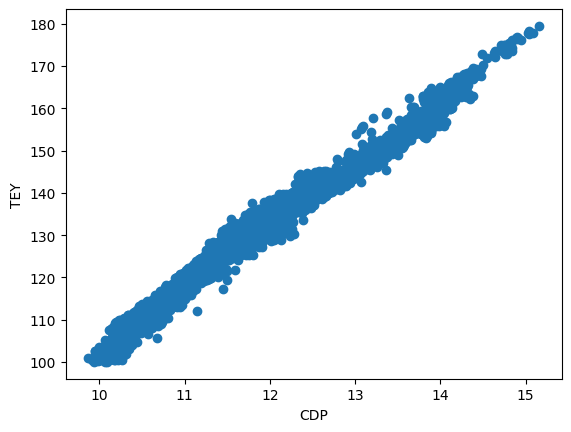

In [22]:
plt.scatter(df.CDP, df.TEY)
plt.xlabel('CDP')
plt.ylabel("TEY")

<AxesSubplot:xlabel='CDP', ylabel='TEY'>

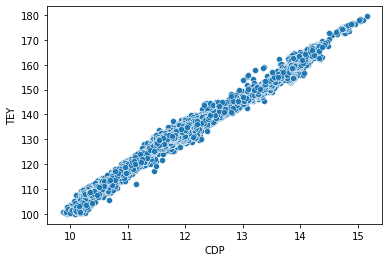

#### Create histograms for CO and NOX.

Text(0.5, 1.0, 'Histogram of CO')

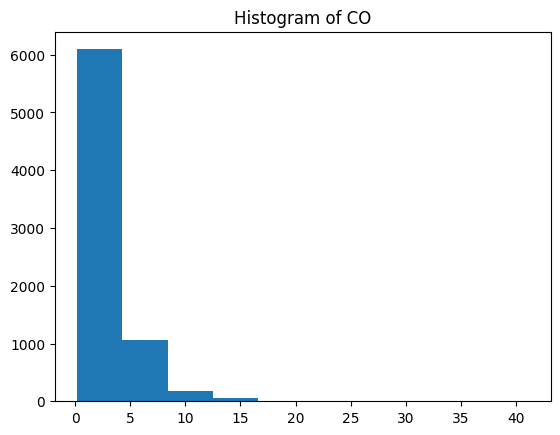

In [23]:
plt.hist(df.CO)
plt.title("Histogram of CO")

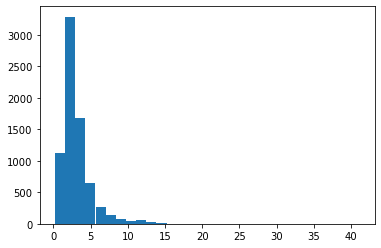

Text(0.5, 1.0, 'Histogram of NOX')

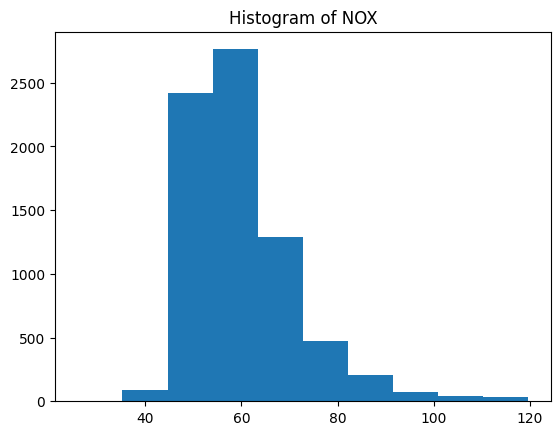

In [24]:
plt.hist(df.NOX)
plt.title("Histogram of NOX")

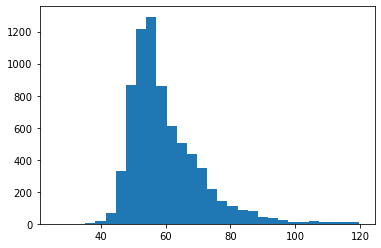

#### Create a sctter plot of CO vs NOX.

Text(0, 0.5, 'CO')

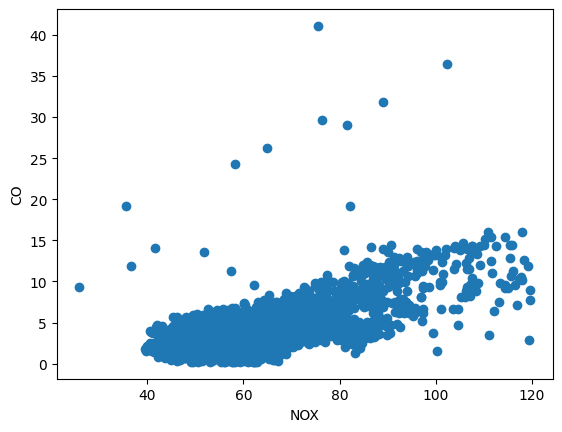

In [25]:
plt.scatter(df.NOX, df.CO)
plt.xlabel("NOX")
plt.ylabel("CO")

<AxesSubplot:xlabel='NOX', ylabel='CO'>

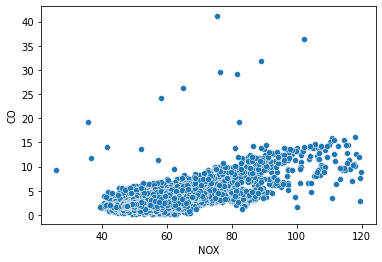

### Prepare data for machine learning

- We will predict CO using all the other variables.
- NOX, which is another emission gas, will not be used as predictor.
- CO is a continuous variable, thus we will be doing regression.
- Many of algorithms that do classification also have regression counterparts.

In [14]:
y = df.CO
X = df.drop(['CO', 'NOX'], axis=1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

In [16]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [29]:
X_train.shape

(5316, 9)

In [30]:
X_val.shape

(1329, 9)

In [31]:
X_test.shape

(739, 9)

## Utility Functions

You can create helper functions.
For example, create functions that take the score and store it in a dataframe for a specific model.

In [17]:
def getMetricScores(model_object, X, y, ml_type):
  predicted = model_object.predict(X)
  if ml_type == 'reg':
    r2 = r2_score(y, predicted)
    rmse = np.sqrt(mean_squared_error(y, predicted))
    print(f"R2 score = {r2:.2f}")
    print(f"RMSE = {rmse:.2f}")
  else:
    tn, fp, fn, tp = confusion_matrix(y, predicted).ravel()
    recall = tp/(tp+fn)
    specificity = tn / (tn+fp)
    precision = tp/(tp+fp)
    balanced_accuracy = (recall+specificity)/2
    f1_score = ((precision*recall)/(precision+recall))*2
    print('Precision: ', precision)
    print('Recall: ', recall)
    print("Specificity: ", specificity)
    print("Balanced accuracy: ", balanced_accuracy)
    print("F1 score: ", f1_score)
  return None

## Q2 [10]

- Apply Linear Regression. Predict CO emission using other variables.
    - What is the model $R^2$ on training data?
    - What is the $R^2$ on validation data?
    - What is the Root Mean Squared Error (RMSE) on training data?
    - What is the RMSE on validation data?
    
> - $R^2$ higher is better. ($R^2$ is % variation in data being explained)  
> - RMSE lower is better. (RMSE (Root Mean Squared Error) is error, meaning the difference between predictions and actual data)  

Hint:  
- You can use the `r2_score` and `mean_squared_error` methods in `sklearn.metrics`.   
- You need to take the square root of Mean Squared Error to get to RMSE. (MSE $\rightarrow$ square root $\rightarrow$ RMSE)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
from sklearn.metrics import r2_score, mean_squared_error

In [35]:
# fit model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [36]:
print("Train metrics")
lin_model.score(X_train, y_train)

Train metrics


0.6640090820784397

In [37]:
# predict and get metrics
print("Test metrics")
getMetricScores(lin_model, X_test, y_test, ml_type='reg')

print("\nVal metrics")
getMetricScores(lin_model, X_val, y_val, ml_type='reg')

Test metrics
R2 score = 0.49
RMSE = 1.66

Val metrics
R2 score = 0.65
RMSE = 1.39


## Q3 [10]

- Apply Random Forest Regression with 100 trees. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

- Is training and validation score close? If not what might be the problem?
- If there is a large gap, try to decrease the gap by changing some hyperparameters of the Random Forest model. (In this analysis, any difference more than 0.10 $R^2$ difference can be assumed to be large.)
    - Once you reach a difference of less than or close to 0.10 between training $R^2$ and validation $R^2$ you can stop.
    - During this process your training score will probably decrease, and that is OK.

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
estimator = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)

In [40]:
# fit model
estimator.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [41]:
print("Train metrics")
estimator.score(X_train, y_train)

Train metrics


0.9635412068046666

In [42]:
# predict and get metrics
print("Test metrics")
getMetricScores(estimator, X_test, y_test, ml_type='reg')

print("\nVal metrics")
getMetricScores(estimator, X_val, y_val, ml_type = 'reg')

Test metrics
R2 score = 0.53
RMSE = 1.59

Val metrics
R2 score = 0.76
RMSE = 1.15


There's a huge gap in train and val scores. This means the model is not generalized on the dataset. This means the model might be overfitting.

This can be reduced by tuning `max_depth`, `n_estimators`, `min_samples_split`.

In [43]:
estimator.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# define param grid
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=5)],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],
    }

In [ ]:
param_grid

{'n_estimators': [100, 325, 550, 775, 1000],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]}

In [ ]:
# tree initiate
rf_model = RandomForestRegressor(random_state = RANDOM_STATE)

In [ ]:
# Create RandomizedSearchCV
random_cv = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=10,
    scoring='r2',
    cv=2,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=2
)

In [ ]:
# random CV
random_cv.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000]},
                   random_state=0, scoring='r2', verbose=2)

In [ ]:
cv_results = random_cv.cv_results_

In [ ]:
train_losses = cv_results['split0_test_score']
val_losses = cv_results['split1_test_score']

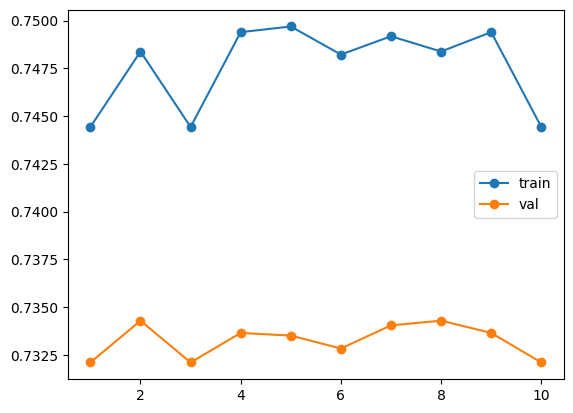

In [ ]:
plt.plot(range(1, len(train_losses) + 1), train_losses, label='train', marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='val', marker='o')
plt.legend()

In [ ]:
random_cv.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_leaf=4, n_estimators=1000,
                      random_state=0)

In [ ]:
best_estimator = random_cv.best_estimator_

In [ ]:
print("Train metrics")
best_estimator.score(X_train, y_train)

Train metrics


0.9658236182865889

In [ ]:
print("Test metrics")
getMetricScores(best_estimator, X_val, y_val)

Test metrics
R2 score = 0.76
RMSE = 1.15


(0.7567708106683442, 1.1514880207445746)

## Q4 [10]

- Apply Support Vector Regression. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Do this for each of the models listed below using the default parameters:  
    1. **Linear kernel SVR**  
    2. **Polynomial kernel SVR**  
    3. **RBF kernel SVR**

In [21]:
from sklearn.svm import SVR
from sklearn.svm import SVC

### Linear SVM Regressor

In [ ]:
estimator = SVR(kernel='linear')
estimator

SVR(kernel='linear')

In [ ]:
# fit model
estimator.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
print("Train metrics")
getMetricScores(estimator, X_train, y_train)

Train metrics
R2 score = 0.62
RMSE = 1.34


(0.6244164650454904, 1.3448714796326715)

In [ ]:
print("Val metrics")
getMetricScores(estimator, X_val, y_val)

Val metrics
R2 score = 0.60
RMSE = 1.47


(0.6021524213732284, 1.4726852520481604)

In [ ]:
print("Val metrics")
getMetricScores(estimator, X_val, y_val)

Val metrics
R2 score = 0.60
RMSE = 1.47


(0.6021524213732284, 1.4726852520481604)

### Polynomial Kernel SVM Regressor

In [20]:
from sklearn.svm import SVR

In [ ]:
from sklearn.svm import SVR
estimator = SVR(kernel='poly')

In [ ]:
# fit model
estimator.fit(X_train, y_train)

SVR(kernel='poly')

In [ ]:
print("Train metrics")
getMetricScores(estimator, X_train, y_train)

Train metrics
R2 score = 0.74
RMSE = 1.12


(0.7404852376508417, 1.1179143857689047)

In [ ]:
print("Val metrics")
getMetricScores(estimator, X_val, y_val)

Val metrics
R2 score = 0.73
RMSE = 1.21


(0.7310487212257806, 1.2108445318365073)

### RBF Kernel SVM Regressor

In [22]:
from sklearn.svm import SVR

In [ ]:

estimator = SVR(kernel='rbf')

In [ ]:
# fit model
estimator.fit(X_train, y_train)

SVR()

In [ ]:
print("Train metrics")
getMetricScores(estimator, X_train, y_train)

Train metrics
R2 score = 0.77
RMSE = 1.06


(0.7653225070588421, 1.0630733502205558)

In [ ]:
print("Val metrics")
getMetricScores(estimator, X_val, y_val)

Val metrics
R2 score = 0.75
RMSE = 1.17


(0.7476173201040636, 1.1729550025939752)

In [ ]:
print("Test metrics")
getMetricScores(estimator, X_test, y_test)

Test metrics
R2 score = 0.59
RMSE = 1.49


(0.5933703930098788, 1.4882133759945957)

### Q5 [10]

- Take RBF Kernel SVM and perform hyperparameter tuning. See if you can increase the $R^2$ score.   
    - Use:  
          'C': [1, 10, 100, 1000]
          'gamma': [0.001, 0.01, 0.1, 1]  

    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

In [82]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# model initiate
svr_rbf_kernel = SVR(kernel='rbf')

In [ ]:
# define params
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1]
}

In [ ]:
# grid search
grid_search = GridSearchCV(
    estimator=svr_rbf_kernel,
    param_grid=param_grid,
    scoring='r2',
    cv=2
)

In [ ]:
# fit grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='r2')

In [ ]:
# best params
grid_search.best_params_

{'C': 1000, 'gamma': 0.01}

In [ ]:
# save best model
best_model = grid_search.best_estimator_

In [ ]:
print("Train metrics")
getMetricScores(best_model, X_train, y_train)

Train metrics
R2 score = 0.79
RMSE = 1.00


(0.7922405098710182, 1.000248586950824)

In [ ]:
print("val metrics")
getMetricScores(best_model, X_val, y_val)

val metrics
R2 score = 0.76
RMSE = 1.15


(0.7568500533369283, 1.1513004313828628)

## Q6 [10]

- Apply PCA and transform the data.
    - For PCA we need to decide on the number of  components. Take sufficient number of components based on variance explained
        - generally it is chosen as the number of components that can explain 90% of the variance
        - or cross-validation accuracy using an ML model.

- Use the PCA transformed data to perform regression. Use the models:
    - Linear Regression
    - Random Forest Regression (Optional to do hyper parameter tuning)
    - RBF Kernel Support Vector Regression (Optional to do hyper parameter tuning)
  
- For each model:  
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Compare these models with their counterparts obtained before. For example: Compare `PCA RBF SVR` with the `RBF SVR` model from before. Do you observe any change in performance? Please explain.


In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=None)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

[0.58158952 0.78924196 0.88751722 0.94337792 0.98704348 0.9959942
 0.99975821 0.99992456 1.        ]


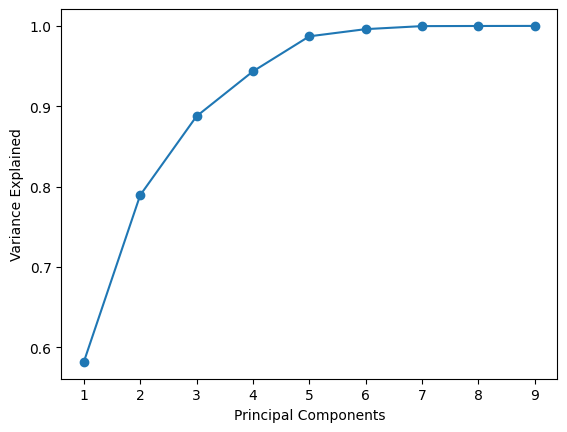

In [26]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

Choose the number of components.

Number of components = 5

In [27]:
X_train_pca2 = X_train_pca[:, 0:5]
X_val_pca2 = X_val_pca[:, 0:5]
X_test_pca2 = X_test_pca[:, 0:5]

**Linear Regression with PCA transformed data**

In [50]:
lin_pca_model = LinearRegression()

In [51]:
# fit model
lin_pca_model.fit(X_train_pca2, y_train)

LinearRegression()

In [52]:
lin_pca_model.score(X_train_pca2, y_train)

0.6557906042002006

In [53]:
print("Train metrics")
getMetricScores(lin_pca_model, X_train_pca2, y_train, ml_type='reg')

Train metrics
R2 score = 0.66
RMSE = 1.29


In [54]:
print("Val metrics")
getMetricScores(lin_pca_model, X_val_pca2, y_val, ml_type='reg')

Val metrics
R2 score = 0.63
RMSE = 1.41


In the linear model without PCA transformation, we saw Train R2 score 0.66 (similar to with PCA) while the test R2 score was 0.45.

Test R2 score has improved by using PCA transformation

**RF Regression with PCA transformed data**

In [28]:
rf_pca_model = RandomForestRegressor(random_state=RANDOM_STATE)

In [295]:
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=5)],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],
    # 'min_samples_split': [int(x) for x in np.linspace(2, 10, num=3)],
    # 'min_samples_leaf': [int(x) for x in np.linspace(1, 10, num=3)]
}

In [296]:
# grid search
grid_search = GridSearchCV(
    estimator=rf_pca_model,
    param_grid=param_grid,
    scoring='r2',
    cv=2
)

In [133]:
# grid search CV
grid_search.fit(X_train_pca2, y_train)

In [132]:
grid_search.best_estimator_

In [29]:

# RandomForestRegressor
best_rf_pca_model = RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_estimators=1000,
                       random_state=0)

In [32]:
best_rf_pca_model = grid_search.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_estimators=1000,
                      random_state=0)

In [ ]:
print("Train scores")
getMetricScores(best_rf_pca_model, X_train_pca2, y_train)

Train scores
R2 score = 0.84
RMSE = 0.87


(0.8433738392586155, 0.8684796815277065)

In [ ]:
print("Val scores")
getMetricScores(best_rf_pca_model, X_val_pca2, y_val)

Val scores
R2 score = 0.75
RMSE = 1.17


(0.7505701405035553, 1.1660731599547756)

The gap between Train R2 score and val R2 score has decreased. This means by applying parameter tuning and PCA transformation, we've eliminated the overfitting issue.

**SVM Regression with PCA transformed data**

In [ ]:
# param grid for SVM
param_grid = {
    'C': [x for x in np.linspace(start=0.1, stop=100, num=15)],
   #  'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

In [ ]:
# svm model
svm_pca_model = SVR(kernel='rbf')

In [ ]:
# grid search
grid_search = GridSearchCV(
    estimator=svm_pca_model,
    param_grid=param_grid,
    scoring='r2',
    cv=2
)

In [ ]:
# fit model
grid_search.fit(X_train_pca2, y_train)

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [0.1, 7.235714285714286, 14.371428571428572,
                               21.50714285714286, 28.642857142857146,
                               35.77857142857143, 42.91428571428572,
                               50.050000000000004, 57.18571428571429,
                               64.32142857142857, 71.45714285714286,
                               78.59285714285714, 85.72857142857143,
                               92.86428571428571, 100.0]},
             scoring='r2')

In [ ]:
grid_search.best_estimator_

SVR(C=7.235714285714286)

In [ ]:
best_svm_pca_model = grid_search.best_estimator_

In [ ]:
print("Train scores")
getMetricScores(best_svm_pca_model, X_train_pca2, y_train)

Train scores
R2 score = 0.79
RMSE = 1.02


(0.7857782144156491, 1.0156856779985706)

In [ ]:
print("Val scores")
getMetricScores(best_svm_pca_model, X_val_pca2, y_val)

Val scores
R2 score = 0.75
RMSE = 1.16


(0.7519344307697009, 1.1628797900961694)

The gap has lower further. However, the R2 score is very low.

## Q7 [10]

#### Let's do  classification

We will convert CO target values into binary form by comparing them to a threshold. $ 0 - 3  mg/m^3$ is the range of max 8-hour avg. ambient CO in most US cities. So let's take that.  
[CO Levels of Concern in Government Recommendations and Regulations](https://www.carbonmonoxidekills.com/are-you-at-risk/carbon-monoxide-levels/)

In [49]:
from sklearn.preprocessing import Binarizer

In [57]:
binarizer = Binarizer(threshold=3)

In [58]:
y_train_cat = binarizer.transform(y_train.values.reshape(-1,1)).ravel()
y_val_cat = binarizer.transform(y_val.values.reshape(-1,1)).ravel()
y_test_cat = binarizer.transform(y_test.values.reshape(-1,1)).ravel()

In [59]:
y_train_cat = pd.Series(y_train_cat)

<Axes: >

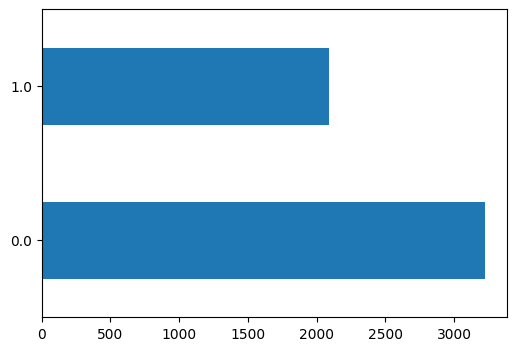

In [60]:
plt.figure(figsize=(6, 4))
y_train_cat.value_counts().plot.barh()

### Fit RBF Kernel SVM Classifier

#### 1. Standardized training data
- Using the standardized training data perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
     - Create confusion matrix
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
     

#### 2. PCA transformed training data
- Using the **pca** transformed training data `X_train_pca2` perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set `X_val_pca2`:
         - Create confusion matrix
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score


In [ ]:
from sklearn.svm import SVC

In [ ]:
estimator = SVC(kernel ='rbf')

#### SVC Model 1

In [87]:
# param grid
param_grid = {'C': [1, 10, 100, 1000],
'gamma': [0.001, 0.01, 0.1, 1]  }

In [84]:
# svc model
svc_classify = SVC(kernel='rbf')

In [65]:
# grid search
grid_search_svc_classify = GridSearchCV(estimator=svc_classify,
    param_grid=param_grid,
    scoring='f1',
    cv=2, verbose=-5)

In [66]:
# fit model
grid_search_svc_classify.fit(X_train, y_train_cat)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='r2', verbose=-5)

In [67]:
# best estimator
grid_search_svc_classify.best_estimator_

SVC(C=100, gamma=0.1)

In [68]:
best_svc_classify = grid_search_svc_classify.best_estimator_

In [71]:
print("Train metrics")
getMetricScores(best_svc_classify, X_train, y_train_cat, ml_type='classification')

Train metrics
Precision:  0.9161904761904762
Recall:  0.9192546583850931
Specificity:  0.9453924914675768
Balanced accuracy:  0.932323574926335
F1 score:  0.917720009539709


In [72]:
print("Val metrics")
getMetricScores(best_svc_classify, X_val, y_val_cat, ml_type='classification')

Val metrics
Precision:  0.9019607843137255
Recall:  0.8897485493230174
Specificity:  0.9384236453201971
Balanced accuracy:  0.9140860973216072
F1 score:  0.8958130477117818


#### SVC Model 2

In [89]:
# grid search
grid_search_svc_classify = GridSearchCV(estimator=svc_classify,
    param_grid=param_grid,
    scoring='f1',
    cv=2, verbose=-5)

In [90]:
# fit using PCA transformed data
grid_search_svc_classify.fit(X_train_pca2, y_train_cat)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='f1', verbose=-5)

In [91]:
# best estimator
grid_search_svc_classify.best_estimator_

SVC(C=10, gamma=0.1)

In [92]:

best_svc_pca_classify = grid_search_svc_classify.best_estimator_

In [82]:
print("Train metrics")
getMetricScores(best_svc_pca_classify, X_train_pca2, y_train_cat, ml_type='classification')

Train metrics
Precision:  0.9056878949927079
Recall:  0.8901098901098901
Specificity:  0.9398076326403971
Balanced accuracy:  0.9149587613751435
F1 score:  0.8978313253012048


In [83]:
print("Val metrics")
getMetricScores(best_svc_pca_classify, X_val_pca2, y_val_cat, ml_type='classification')

Val metrics
Precision:  0.9105691056910569
Recall:  0.8665377176015474
Specificity:  0.9458128078817734
Balanced accuracy:  0.9061752627416604
F1 score:  0.8880079286422201


## Q8 [10]

- For regression:
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed.
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate.
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

The performance of the Random Forest model can be improved by:


1.   Outlier handling
2.   Ensemble technique



### Outlier handling

In [87]:
plt_df = pd.melt(X, var_name='Feature', value_name='Value')

In [91]:
plt_df

Feature     Value
0          AT   1.95320
1          AT   1.21910
2          AT   0.94915
3          AT   1.00750
4          AT   1.28580
...       ...       ...
66451     CDP  10.41100
66452     CDP  10.34400
66453     CDP  10.46200
66454     CDP  11.77100
66455     CDP  11.46200

[66456 rows x 2 columns]

<Axes: xlabel='Feature', ylabel='Value'>

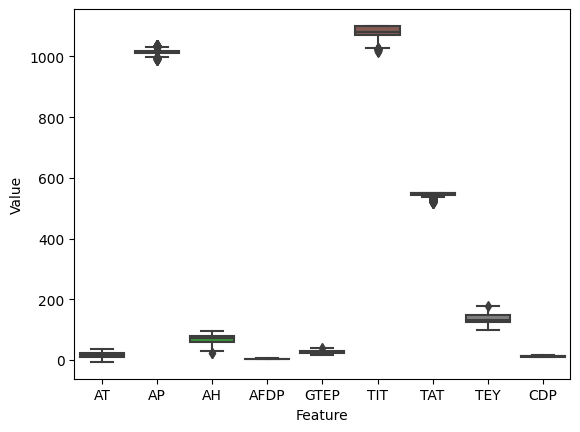

In [93]:
sns.boxplot(y='Value', x = 'Feature', data = plt_df)

We will remove outliers from AP, TIT and TAT

In [95]:
cols = ['AP', 'TIT', 'TAT']

In [96]:
for col in cols:
  z_scores = (X[col] - X[col].mean()) / X[col].std()
  df_no_outliers = X[abs(z_scores) <= 3]

In [107]:
df_no_outliers

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP
0     1.95320  1020.1  84.985  2.5304  20.116  1048.7  544.92  116.27  10.799
1     1.21910  1020.1  87.523  2.3937  18.584  1045.5  548.50  109.18  10.347
2     0.94915  1022.2  78.335  2.7789  22.264  1068.8  549.95  125.88  11.256
3     1.00750  1021.7  76.942  2.8170  23.358  1075.2  549.63  132.21  11.702
4     1.28580  1021.6  76.732  2.8377  23.483  1076.2  549.68  133.58  11.737
...       ...     ...     ...     ...     ...     ...     ...     ...     ...
7379  3.62680  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411
7380  4.16740  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344
7381  5.48200  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462
7382  5.88370  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771
7383  6.03920  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462

[7248 rows x 9 columns]

In [283]:
# Create X and y by drop index with outliers
X_no_outlrs = df_no_outliers
y_no_outlrs = y[df_no_outliers.index]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_no_outlrs, y_no_outlrs, test_size=0.10, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

In [114]:
pca = PCA(n_components=None)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

[0.68828158 0.88100173 0.95228525 0.97825867 0.99776172 0.99977699
 0.99997899 0.99999771 1.        ]


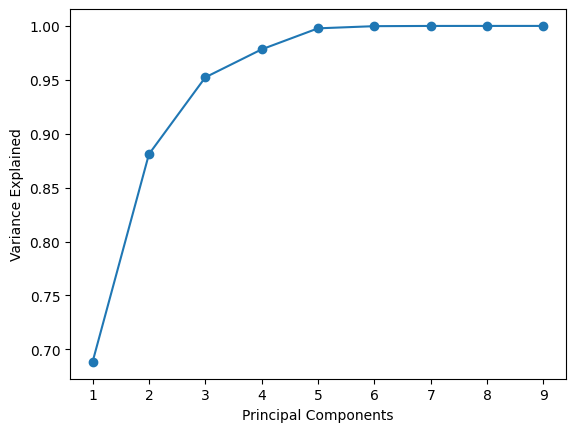

In [115]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

In [277]:
X_train_pca2 = X_train_pca[:, 0:5]
X_val_pca2 = X_val_pca[:, 0:5]
X_test_pca2 = X_test_pca[:, 0:5]

In [278]:
# initiate model
rf_model = RandomForestRegressor(random_state=RANDOM_STATE,
                                 max_depth=20,
                                 min_samples_leaf=5,
                                 n_estimators=1000)

In [279]:
# fit model
rf_model.fit(X_train_pca2, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_estimators=1000,
                      random_state=0)

In [131]:
# Train scores
# R2 score = 0.84
# RMSE = 0.87
# (0.8433738392586155, 0.8684796815277065)

# Val scores
# R2 score = 0.75
# RMSE = 1.17
# (0.7505701405035553, 1.1660731599547756)

In [132]:
print("Train metrics")
getMetricScores(rf_model, X_train_pca2, y_train, ml_type='reg')

Train metrics
R2 score = 0.83
RMSE = 0.94


In [133]:
print("Test metrics")
getMetricScores(rf_model, X_val_pca2, y_val, ml_type='reg')

Test metrics
R2 score = 0.76
RMSE = 1.00


### Ensamble Learning

In [142]:
from sklearn.ensemble import VotingRegressor

In [135]:
# build another model
# svm model
svm_model = SVR(kernel='rbf')

In [136]:
svm_model.fit(X_train_pca2, y_train)

SVR()

In [140]:
print("Train metrics")
getMetricScores(svm_model, X_train_pca2, y_train, ml_type='reg')

Train metrics
R2 score = 0.78
RMSE = 0.95


In [138]:
print("Val metrics")
getMetricScores(svm_model, X_val_pca2, y_val, ml_type='reg')

Train metrics
R2 score = 0.73
RMSE = 1.18


In [143]:
# Ensamble
voting_regressor = VotingRegressor(estimators=[('model1', rf_model), ('model2', svm_model)])

In [144]:
voting_regressor.fit(X_train_pca2, y_train)

VotingRegressor(estimators=[('model1',
                             RandomForestRegressor(max_depth=20,
                                                   min_samples_leaf=5,
                                                   n_estimators=1000,
                                                   random_state=0)),
                            ('model2', SVR())])

In [146]:
print("Train metrics")
getMetricScores(voting_regressor, X_train_pca2, y_train, ml_type='reg')

Train metrics
R2 score = 0.79
RMSE = 1.05


In [149]:
print("Val metrics")
getMetricScores(voting_regressor, X_val_pca2, y_val, ml_type='reg')

Val metrics
R2 score = 0.77
RMSE = 0.96


This proves that ensambling model results together improves the performance.

Here we have used Random Forest and SVM regressor model and combined using `sklearn.enseemble.voting_regressor`.
It combines the predictions from multiple models, which can help improve overall regression performance by reducing the variance

## Q9 [10]

- For classification:
    - Try at least one classifier other than SVM (RF, GBM, Logistic Regression, etc).
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed.
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate.
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

As we've seen in regression problem, the performance is improved using


1.   Gradient Boosting model
2.   Ensemble

Here, we will try different model and see if it can help improve the F1 score. The best F1 achieved was 0.89 using SVM model

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
# model
gbm_model = GradientBoostingClassifier(random_state=RANDOM_STATE)

In [56]:
binarizer = Binarizer(threshold=3)

In [57]:
y_train_cat = binarizer.transform(y_train.values.reshape(-1,1)).ravel()
y_val_cat = binarizer.transform(y_val.values.reshape(-1,1)).ravel()
y_test_cat = binarizer.transform(y_test.values.reshape(-1,1)).ravel()

In [58]:
y_train_cat

array([1., 0., 0., ..., 1., 1., 0.])

In [59]:
# fit model
gbm_model.fit(X_train, y_train_cat)

GradientBoostingClassifier(random_state=0)

In [60]:
best_grdnt_bstng_classifier = gbm_model

In [61]:
best_grdnt_bstng_classifier

GradientBoostingClassifier(random_state=0)

In [62]:
print("Train metrics")
getMetricScores(best_grdnt_bstng_classifier, X_train, y_train_cat, ml_type='classification')

Train metrics
Precision:  0.928082191780822
Recall:  0.9063545150501672
Specificity:  0.9543903195780329
Balanced accuracy:  0.9303724173141
F1 score:  0.9170896785109983


In [63]:
print("Train metrics")
getMetricScores(best_grdnt_bstng_classifier, X_val, y_val_cat, ml_type='classification')

Train metrics
Precision:  0.9089068825910931
Recall:  0.8684719535783365
Specificity:  0.9445812807881774
Balanced accuracy:  0.9065266171832569
F1 score:  0.8882294757665677


### Ensemble











In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
# build another model
gnb_classify = GaussianNB()

In [66]:
gnb_classify.fit(X_train, y_train_cat)

GaussianNB()

In [67]:
print("Train metrics")
getMetricScores(gnb_classify, X_train, y_train_cat, ml_type='classification')

Train metrics
Precision:  0.7530266343825666
Recall:  0.8915432393693263
Specificity:  0.8101147998758921
Balanced accuracy:  0.8508290196226092
F1 score:  0.8164515423320937


In [68]:
print("Test metrics")
getMetricScores(gnb_classify, X_train, y_train_cat, ml_type='classification')

Test metrics
Precision:  0.7530266343825666
Recall:  0.8915432393693263
Specificity:  0.8101147998758921
Balanced accuracy:  0.8508290196226092
F1 score:  0.8164515423320937


In [69]:
# build SVM classifier
svm_classify = SVC(C=10, gamma=0.1)

In [70]:
svm_classify.fit(X_train, y_train_cat)

SVC(C=10, gamma=0.1)

In [71]:
print("Train metrics")
getMetricScores(svm_classify, X_train, y_train_cat, ml_type = 'classification')

Train metrics
Precision:  0.9121197489135683
Recall:  0.9025322503583373
Specificity:  0.9435308718585169
Balanced accuracy:  0.9230315611084271
F1 score:  0.9073006724303554


In [72]:
print("Test metrics")
getMetricScores(svm_classify, X_test, y_test_cat, ml_type = 'classification')

Test metrics
Precision:  0.9080459770114943
Recall:  0.8713235294117647
Specificity:  0.9486081370449678
Balanced accuracy:  0.9099658332283662
F1 score:  0.8893058161350845


In [73]:
# Ensemble results
from sklearn.ensemble import VotingClassifier

In [74]:
# Create a VotingClassifier with the three models
voting_classifier = VotingClassifier(
    estimators=[('model1', best_grdnt_bstng_classifier), ('model2', gnb_classify), ('model3', svm_classify)],
    voting='hard'  # Use 'soft' for weighted voting with probabilities
)

In [75]:
voting_classifier.fit(X_train, y_train_cat)

VotingClassifier(estimators=[('model1',
                              GradientBoostingClassifier(random_state=0)),
                             ('model2', GaussianNB()),
                             ('model3', SVC(C=10, gamma=0.1))])

In [76]:
print('Train metrics')
getMetricScores(voting_classifier, X_train, y_train_cat, ml_type = 'classification')

Train metrics
Precision:  0.9161008729388943
Recall:  0.9025322503583373
Specificity:  0.9463233012721067
Balanced accuracy:  0.924427775815222
F1 score:  0.909265944645006


In [77]:
print('Val metrics')
getMetricScores(voting_classifier, X_val, y_val_cat, ml_type = 'classification')

Val metrics
Precision:  0.9131313131313131
Recall:  0.874274661508704
Specificity:  0.9470443349753694
Balanced accuracy:  0.9106594982420367
F1 score:  0.8932806324110671


## Q10 [10]

- Choose the best 2 regressors among the trained regressions models:
- Create a table summarizing results on the **test** set for regression (with target variables in `y_test`):
    - Show the R^2 and RMSE performance metrics on test data for each model.
- Which model is best for regression? Is this in line with your analysis (the validation performance of the models) or is this not expected?



- Choose the best 2 classifiers among the trained classification models:
- Create a table summarizing results on the **test** set for classification (with target variables in `y_test_cat`):
    - Show the classification performance metrics (accuracy, recall, precision, f1-score, etc.) on test data for each model.
- Which model is best for classification? Is this in line with your analysis (the validation performance of the models) or is this not expected?



> Note that the same transformation used during training should be applied on the testing set. (If you applied PCA on training data for the selected model, you need to apply PCA on the testing set as well.)



### Regression

Performance of SVR and RandomForest regression have the best performance.

In [33]:
y_test.head()

6307     2.6847
5036     1.9461
1995     3.6930
4156     2.0445
6328    11.1550
Name: CO, dtype: float64

In [39]:
# performance on best models
print("Test metrics of random forest")
getMetricScores(best_rf_pca_model, X_test_pca2, y_test, ml_type = 'reg')

Test metrics of random forest
R2 score = 0.54
RMSE = 1.58


In [96]:
preds = best_rf_pca_model.predict(X_test_pca2)

In [98]:
r2_scr_mod1 = r2_score(y_test, preds)
rmse_scr_mod1 = mean_squared_error(y_test, preds)

In [97]:
data = [
    {'Model': 'rf_pca_model', 'R2 Score': r2_scr_mod1, 'RMSE': 10.2},
    {'Model': 'Model2', 'R2 Score': 0.92, 'RMSE': 8.5},
    {'Model': 'Model3', 'R2 Score': 0.78, 'RMSE': 12.0}
]

0.54150116696057

In [42]:
print("Test metrics")
getMetricScores(best_svm_pca_model, X_test_pca2, y_test, ml_type = 'reg')

Test metrics
R2 score = 0.59
RMSE = 1.50


In [99]:
preds = best_svm_pca_model.predict(X_test_pca2)

In [100]:
r2_scr_mod2 = r2_score(y_test, preds)
rmse_scr_mod2 = mean_squared_error(y_test, preds)

In [104]:
data = [
    {'Model': 'rf_pca_model', 'R2 Score': r2_scr_mod1, 'RMSE': 10.2},
    {'Model': 'svm_pca_model', 'R2 Score': r2_scr_mod2, 'RMSE': rmse_scr_mod2}
]

In [105]:
reg_table = pd.DataFrame(data)

In [130]:
reg_table.sort_values("R2 Score", ascending=False)

Model  R2 Score       RMSE
1  svm_pca_model  0.585885   2.255551
0   rf_pca_model  0.541501  10.200000

As seen above, the performance of the best Random Forest model and SVM model is not performing well on the test data.

This is not expected as the performance of best model is above 0.70.

I think SVM is the best model for regression.

### Classification

In [107]:
print("Test metrics")
getMetricScores(voting_classifier, X_test, y_test_cat, ml_type='classification')

Test metrics
Precision:  0.9263565891472868
Recall:  0.8786764705882353
Specificity:  0.9593147751605996
Balanced accuracy:  0.9189956228744174
F1 score:  0.9018867924528301


In [121]:
preds = voting_classifier.predict(X_test)

In [122]:
tn, fp, fn, tp = confusion_matrix(y_test_cat, preds).ravel()
recall = tp/(tp+fn)
specificity = tn / (tn+fp)
precision = tp/(tp+fp)
balanced_accuracy = (recall+specificity)/2
f1_scr = ((precision*recall)/(precision+recall))*2

In [123]:
model1 = {
    'Model': 'voting_classifier',
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_scr,
    "Balanced Accuracy":balanced_accuracy
}

In [124]:
getMetricScores(best_svc_pca_classify, X_test_pca2, y_test_cat, ml_type = 'classification')

Precision:  0.9007633587786259
Recall:  0.8676470588235294
Specificity:  0.9443254817987152
Balanced accuracy:  0.9059862703111223
F1 score:  0.8838951310861423


In [125]:
preds = best_svc_pca_classify.predict(X_test_pca2)

In [126]:
tn, fp, fn, tp = confusion_matrix(y_test_cat, preds).ravel()
recall = tp/(tp+fn)
specificity = tn / (tn+fp)
precision = tp/(tp+fp)
balanced_accuracy = (recall+specificity)/2
f1_scr = ((precision*recall)/(precision+recall))*2

In [127]:
model2 = {
    'Model': 'svc_pca_classifier',
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_scr,
    "Balanced Accuracy":balanced_accuracy
}

In [128]:
data = [model1, model2]
class_metrics = pd.DataFrame(data)

In [131]:
class_metrics.sort_values("F1 Score", ascending=False)

Model  Precision    Recall  F1 Score  Balanced Accuracy
0   voting_classifier   0.926357  0.878676  0.901887           0.918996
1  svc_pca_classifier   0.900763  0.867647  0.883895           0.905986

This shows that ensembling of models can help in improving the performance overall.

Ensamble models (of Gradiane Boosting Classifier, Naive Bayes and svm classifier) are best for this dataset

- What did you learn in this project? Any suggestions?

This project helps in understanding how different modelling techniques can help in improving the performance of the model.

ALso, it tells us that sometimes it helps to turn a problem from regression to classification and vice versa.

# Thank you
Ilyas Ustun  
twitter: \_ilyas\_ustun\_